In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('/content/mobile_price_classification.csv')

In [3]:
train_df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_df.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
print(train_df.describe())


       battery_power  bluetooth  clock_speed     dual_sim    front_cam  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

                4G   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

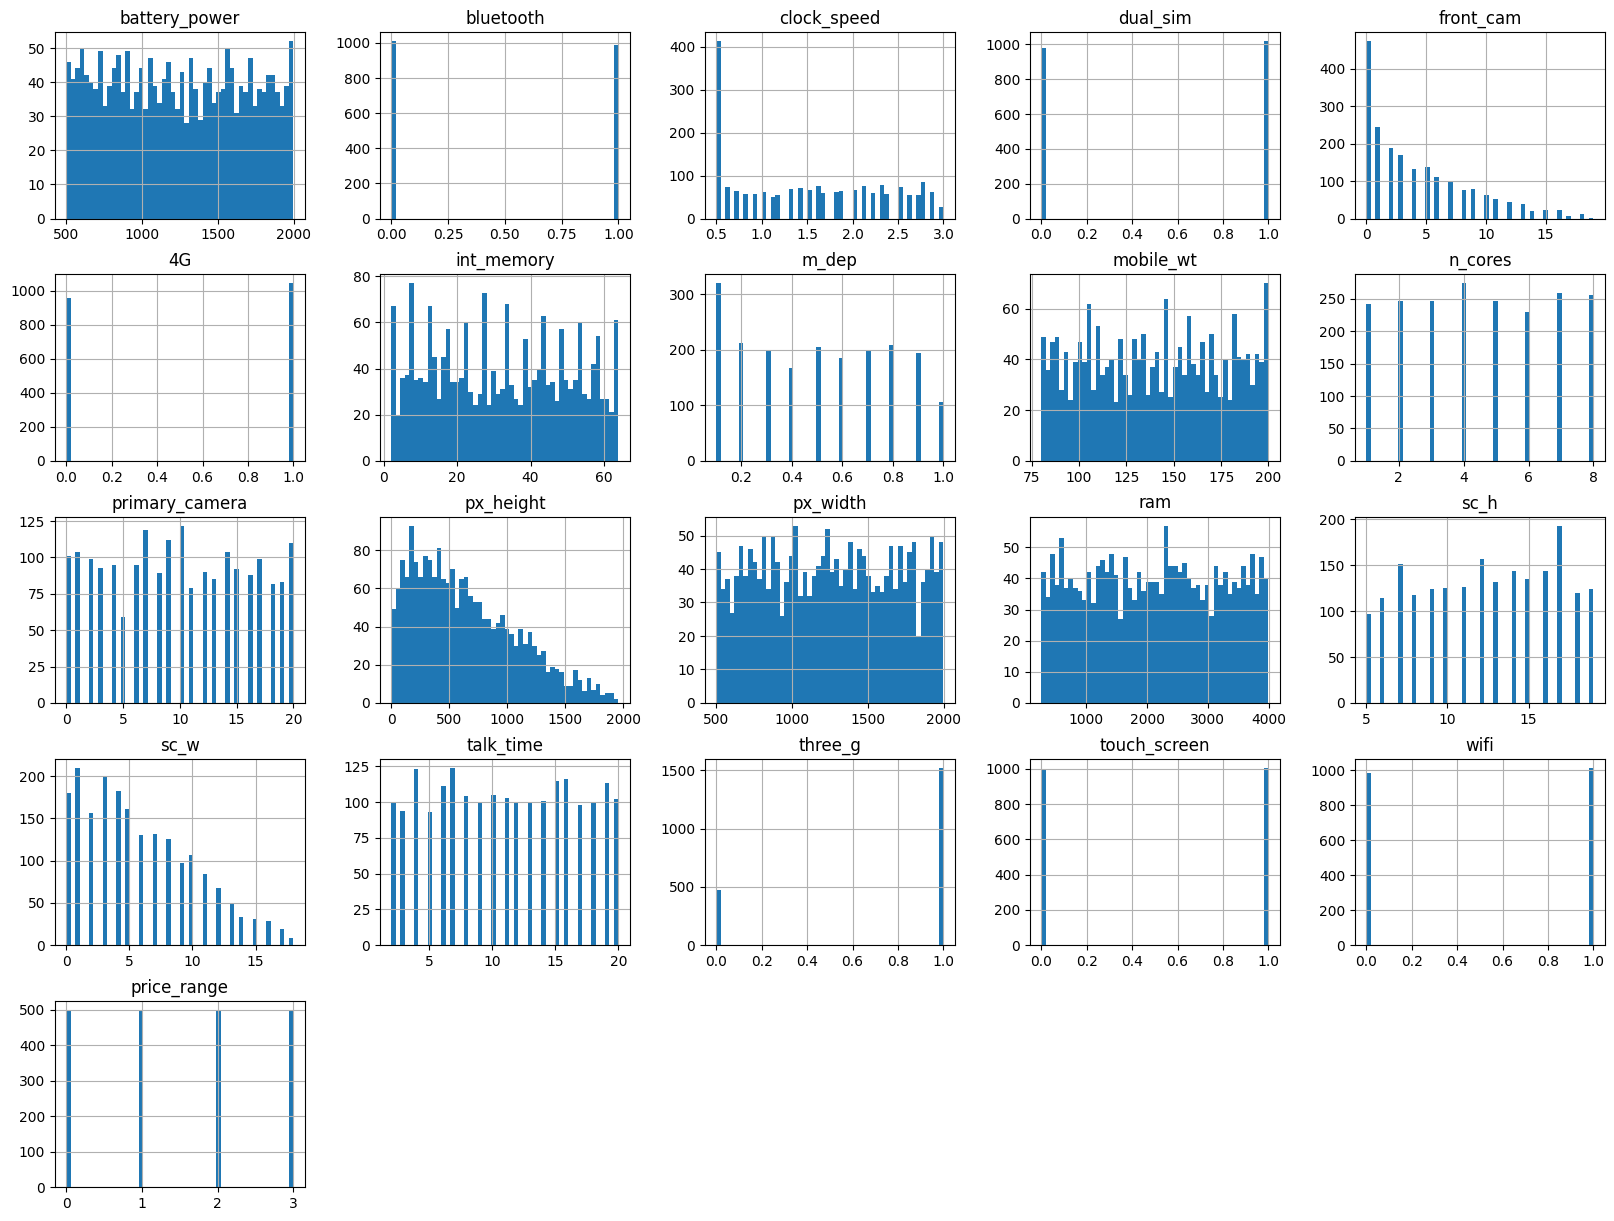

In [7]:
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()


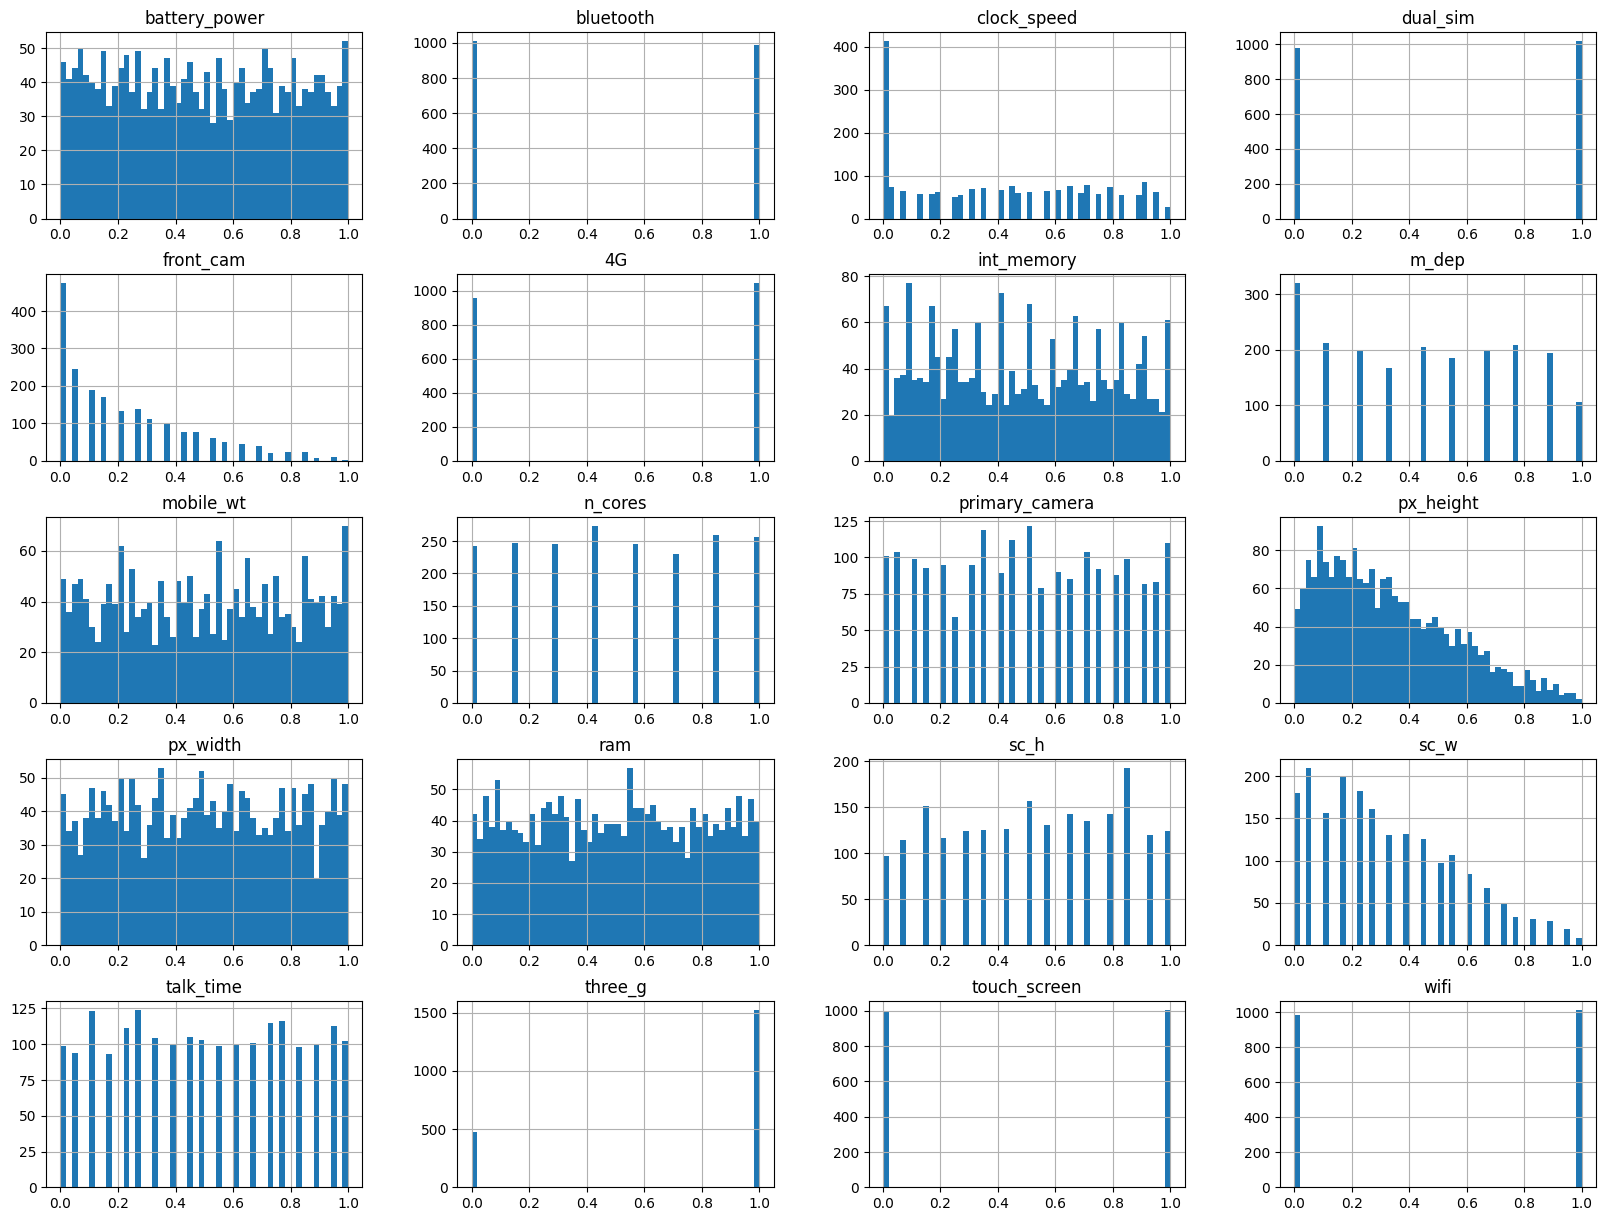

In [8]:
#Normalizing the features so they all have the same scale will prevent any single
#feature from disproportionately influencing the learning process, thus potentially
#improving model performance.

from sklearn.preprocessing import MinMaxScaler

feature_df = train_df.drop('price_range', axis=1)

scaler = MinMaxScaler()
feature_df_scaled = scaler.fit_transform(feature_df)

# Converting back to Pandas DataFrame for ease of use
feature_df_scaled = pd.DataFrame(feature_df_scaled, columns=feature_df.columns)

feature_df_scaled.hist(bins=50, figsize=(20,15))
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

X = feature_df_scaled
# Make sure 'y' contains the target variable 'price_range'
y = train_df['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    #Dense(64, activation='relu'),  # Hidden layer
    Dense(4, activation='softmax')  # Output layer, assuming there are 4 classes in 'price_range'
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Add early_stopping to the model's fit method
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 1.1897 - accuracy: 0.4781 - val_loss: 0.8462 - val_accuracy: 0.7100
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.7369 - val_loss: 0.5530 - val_accuracy: 0.8200
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.8163 - val_loss: 0.4343 - val_accuracy: 0.8400
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8712 - val_loss: 0.3544 - val_accuracy: 0.8675
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8794 - val_loss: 0.3270 - val_accuracy: 0.8650
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.8938 - val_loss: 0.2965 - val_accuracy: 0.8650
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9162 - val_loss: 0.2237 - val_accuracy: 0.9225